In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qutip as qt

In [113]:
num_levels = 3


a = qt.destroy(num_levels)

a1 = qt.tensor([a, qt.qeye(num_levels), qt.qeye(num_levels)])
a2 = qt.tensor([qt.qeye(num_levels), a, qt.qeye(num_levels)])
a3 = qt.tensor([qt.qeye(num_levels), qt.qeye(num_levels), a])


omega_1 = 4000 * 2 * np.pi

omega_2 = 4000 * 2 * np.pi
omega_3 = 3950 * 2 * np.pi

J_12 = 10 * 2*np.pi
J_23 = 10 * 2*np.pi
J_13 = 10 * 2*np.pi   
J_13 = 0 * 2*np.pi   

U = -200 * 2 * np.pi

H = omega_1 * a1.dag() * a1 + omega_2 * a2.dag() * a2 + omega_3 * a3.dag() * a3
H += U*(a1.dag() * a1*(a1.dag() * a1 - 1) + a2.dag() * a2*(a2.dag() * a2 - 1) + a3.dag() * a3*(a3.dag() * a3 - 1))
H += J_12*(a1.dag() * a2 + a2.dag() * a1) + J_23*(a2.dag() * a3 + a3.dag() * a2) + J_13*(a1.dag() * a3 + a3.dag() * a1)

In [114]:
times = np.linspace(0, 0.5, 1001)
psi0 = qt.basis([num_levels]*3, [1, 0, 0])

result = qt.sesolve(H, psi0, times, [a1.dag() * a1, a2.dag() * a2, a3.dag() * a3])

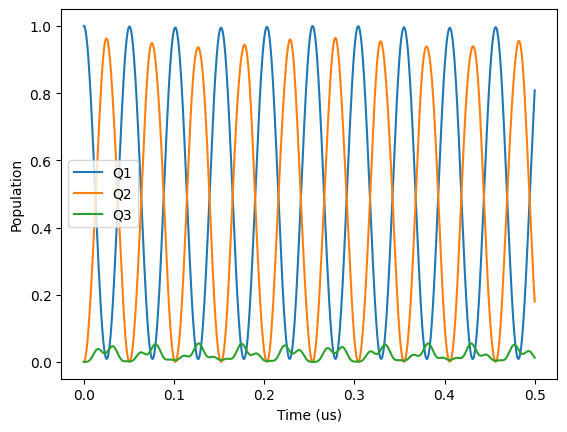

In [115]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')

plt.xlabel('Time (us)')
plt.ylabel('Population')

plt.legend()
plt.show()

In [116]:
# measure in Q2-Q3 hybridized basis

H_23 = omega_2 * a2.dag() * a2 + omega_3 * a3.dag() * a3
H_23 += U*(a2.dag() * a2*(a2.dag() * a2 - 1) + a3.dag() * a3*(a3.dag() * a3 - 1))
H_23 += J_23*(a2.dag() * a3 + a3.dag() * a2)

eigenenergies, eigenstates = H_23.eigenstates()

In [117]:
print(eigenenergies/2/np.pi)



q2_state_indices = [6, 7, 8]
q3_state_indices = [3, 4, 5]

q2_dressed_frequency = eigenenergies[q2_state_indices[0]] / 2 / np.pi
print(f'q2 dressed frequency: {q2_dressed_frequency}')

q2_state_projector = sum([eigenstates[index]*eigenstates[index].dag() for index in q2_state_indices])
q3_state_projector = sum([eigenstates[index]*eigenstates[index].dag() for index in q3_state_indices])

q2_state_projector

[    0.             0.             0.          3948.07417596
  3948.07417596  3948.07417596  4001.92582404  4001.92582404
  4001.92582404  7499.55402423  7499.55402423  7499.55402423
  7599.43275069  7599.43275069  7599.43275069  7951.01322508
  7951.01322508  7951.01322508 11492.98437881 11492.98437881
 11492.98437881 11557.01562119 11557.01562119 11557.01562119
 15100.         15100.         15100.        ]
q2 dressed frequency: 4001.9258240356717


Quantum object: dims=[[3, 3, 3], [3, 3, 3]], shape=(27, 27), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.03576165 0.         0.18569534 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.18569534 0.         0.96423835 0.         0.
 

In [118]:
omega_1 = 4000 * 2 * np.pi

H = omega_1 * a1.dag() * a1 + omega_2 * a2.dag() * a2 + omega_3 * a3.dag() * a3
H += U*(a1.dag() * a1*(a1.dag() * a1 - 1) + a2.dag() * a2*(a2.dag() * a2 - 1) + a3.dag() * a3*(a3.dag() * a3 - 1))
H += J_12*(a1.dag() * a2 + a2.dag() * a1) + J_23*(a2.dag() * a3 + a3.dag() * a2) + J_13*(a1.dag() * a3 + a3.dag() * a1)

times = np.linspace(0, 0.5, 1001)
psi0 = qt.basis([num_levels]*3, [1, 0, 0])

result = qt.sesolve(H, psi0, times, [a1.dag() * a1, q2_state_projector, q3_state_projector])

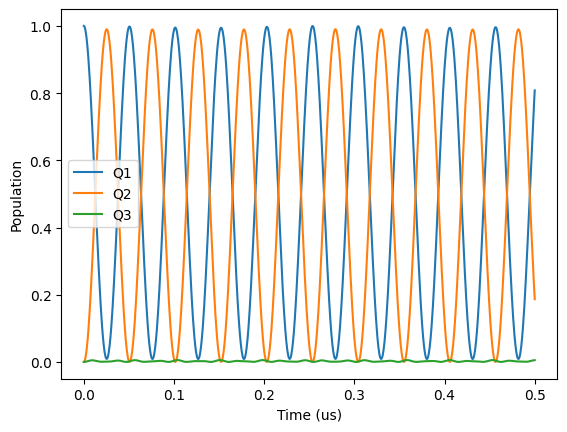

max Q3 population: 0.005653022177822788
contrast: 0.9901948941148463


In [119]:
for i in range(len(result.expect)):
    plt.plot(times, result.expect[i], label=f'Q{i+1}')

plt.xlabel('Time (us)')
plt.ylabel('Population')

plt.legend()
plt.show()

print(f'max Q3 population: {np.max(result.expect[2])}')
print(f'contrast: {np.max(result.expect[1])}')

In [121]:
# sweep Q1 frequency

frequencies = np.linspace(3900, 4100, 101) * 2 * np.pi
frequencies = np.linspace(3975, 4025, 201) * 2 * np.pi

times = np.linspace(0, 0.5, 1001)
psi0 = qt.basis([num_levels]*3, [1, 0, 0])
e_ops = [a1.dag() * a1, q2_state_projector, q3_state_projector]

max_Q3_populations = []

contrasts = []

populations = np.zeros((3, len(frequencies), len(times)))

for i in range(len(frequencies)):
    H =  frequencies[i] * a1.dag() * a1 + omega_2 * a2.dag() * a2 + omega_3 * a3.dag() * a3
    H += U*(a1.dag() * a1*(a1.dag() * a1 - 1) + a2.dag() * a2*(a2.dag() * a2 - 1) + a3.dag() * a3*(a3.dag() * a3 - 1))
    H += J_12*(a1.dag() * a2 + a2.dag() * a1) + J_23*(a2.dag() * a3 + a3.dag() * a2) + J_13*(a1.dag() * a3 + a3.dag() * a1)


    result = qt.sesolve(H, psi0, times, e_ops)

    max_Q3_populations.append(np.max(result.expect[2]))
    contrasts.append(np.max(result.expect[1]))

    populations[:, i, :] = result.expect


    


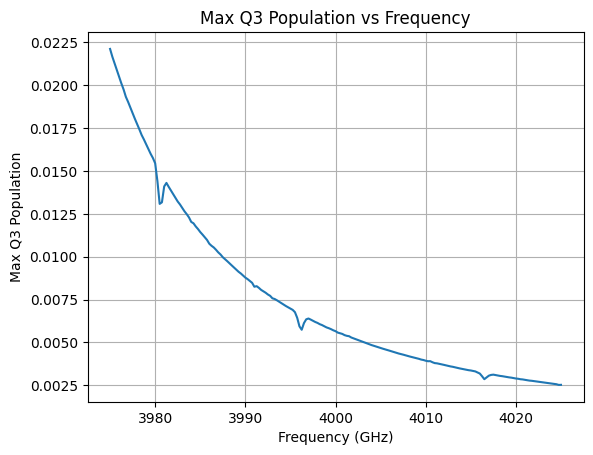

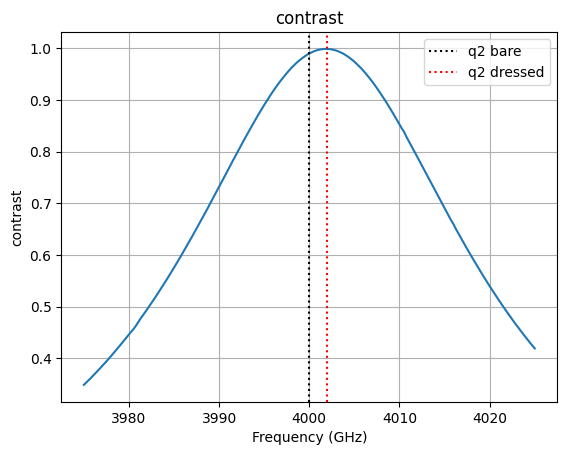

maximum contrast of 0.9990119579587463 at frequency 4001.75 GHz
contrast at bare frequency: 0.9901948941148463
contrast at dressed frequency: 0.9989244381380664
bare frequency: 3999.9999999999995 GHz
dressed frequency: 4001.9258240356717 GHz


In [122]:
plt.plot(frequencies/2/np.pi, max_Q3_populations)

plt.xlabel('Frequency (GHz)')
plt.ylabel('Max Q3 Population')
plt.title('Max Q3 Population vs Frequency')
plt.grid()
plt.show()


plt.plot(frequencies/2/np.pi, contrasts)
plt.axvline(omega_2/2/np.pi, linestyle=':', color='black', label='q2 bare')
plt.axvline(q2_dressed_frequency, linestyle=':', color='red', label='q2 dressed')


plt.legend()

plt.xlabel('Frequency (GHz)')
plt.ylabel('contrast')
plt.title('contrast')
plt.grid()
plt.show()

print(f'maximum contrast of {np.max(contrasts)} at frequency {frequencies[np.argmax(contrasts)]/2/np.pi} GHz')

print(f'contrast at bare frequency: {contrasts[np.argmin(np.abs(frequencies - omega_2))]}')
print(f'contrast at dressed frequency: {contrasts[np.argmin(np.abs(frequencies - q2_dressed_frequency*2*np.pi))]}')

print(f'bare frequency: {omega_2/2/np.pi} GHz')
print(f'dressed frequency: {q2_dressed_frequency} GHz')


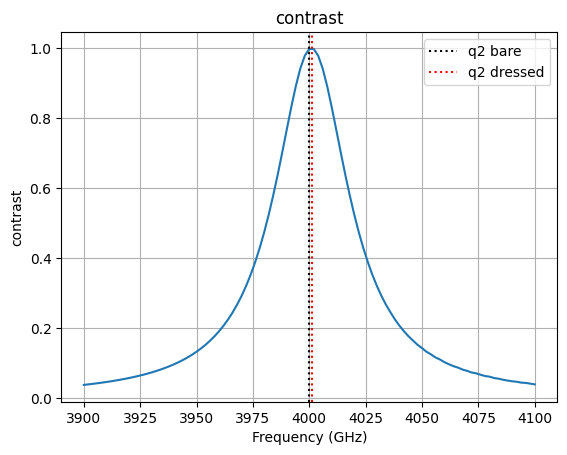

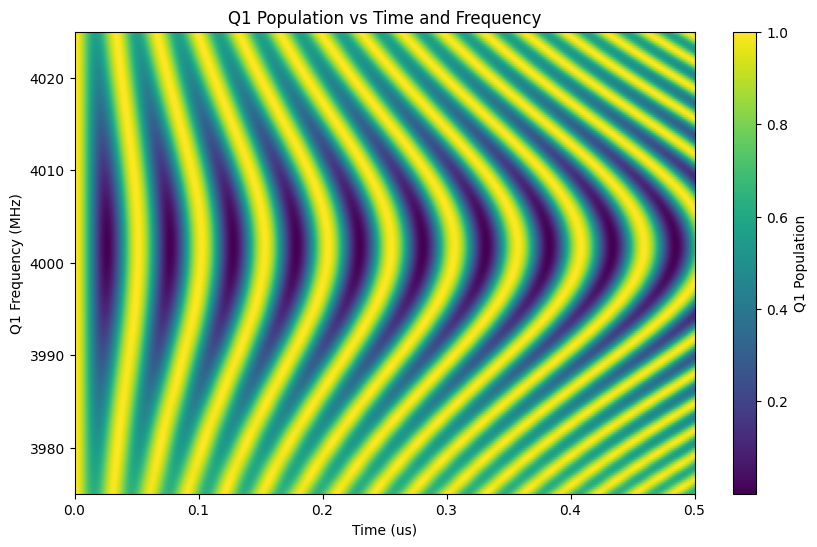

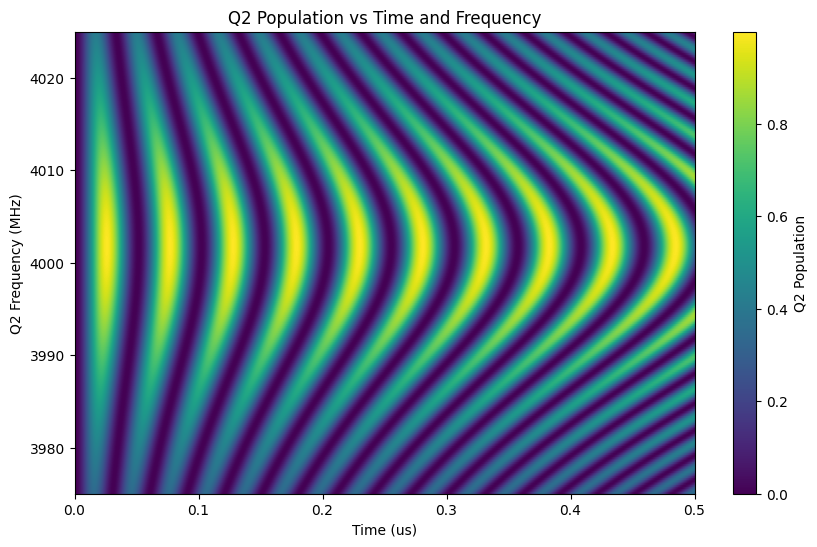

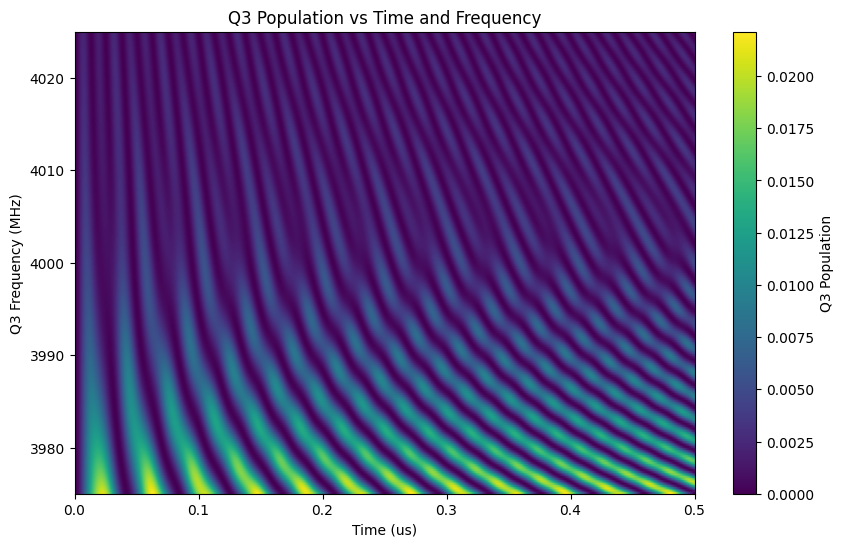

In [126]:
for i in range(populations.shape[0]):

    plt.figure(figsize=(10, 6))
    plt.imshow(populations[i], aspect='auto', origin='lower', 
            extent=[times[0], times[-1], frequencies[0]/2/np.pi, frequencies[-1]/2/np.pi])
    plt.colorbar(label=f'Q{i+1} Population')
    plt.xlabel('Time (us)')
    plt.ylabel(f'Q{i+1} Frequency (MHz)')
    plt.title(f'Q{i+1} Population vs Time and Frequency')
    plt.show()

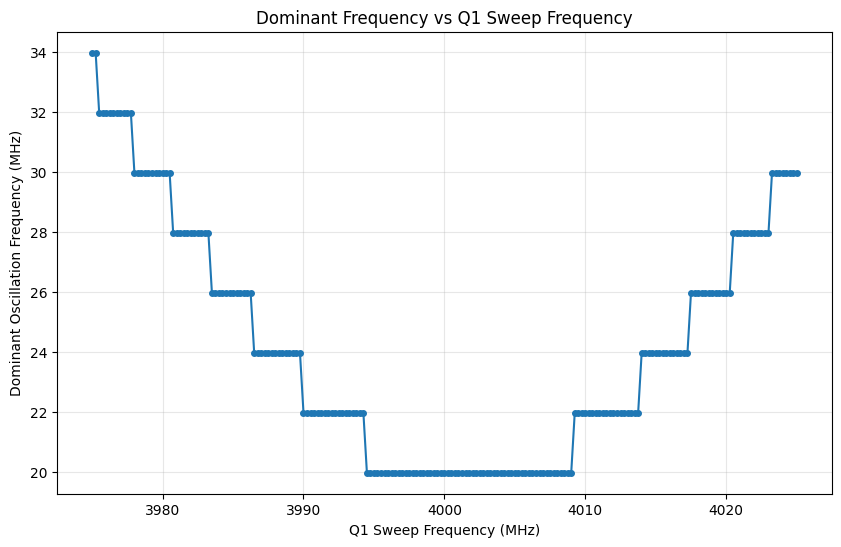

Range of dominant frequencies: 19.98 to 33.97 MHz
Maximum dominant frequency: 33.97 MHz at sweep frequency: 3975.00 MHz
Minimum dominant frequency: 19.98 MHz at sweep frequency: 3994.50 MHz


In [131]:
# Calculate FFT for each frequency in the sweep
dominant_frequencies = []
dt = times[1] - times[0]  # Time step
freq_axis = np.fft.fftfreq(len(times), dt)  # Frequency axis for FFT

for i in range(len(frequencies)):
    # Get population data for this sweep frequency
    pop_data = populations[0, i, :]
    
    # Calculate FFT
    fft_data = np.fft.fft(pop_data)
    fft_magnitude = np.abs(fft_data)
    
    # Find dominant frequency (excluding DC component at index 0)
    # Only consider positive frequencies
    positive_freq_mask = freq_axis > 0
    dominant_idx = np.argmax(fft_magnitude[positive_freq_mask]) + 1  # +1 to account for skipping DC
    dominant_freq = freq_axis[dominant_idx]
    
    dominant_frequencies.append(dominant_freq)

# Convert to numpy array for easier manipulation
dominant_frequencies = np.array(dominant_frequencies)

# Plot dominant frequency vs sweep frequency
plt.figure(figsize=(10, 6))
plt.plot(frequencies/2/np.pi, dominant_frequencies, 'o-', markersize=4)
plt.xlabel('Q1 Sweep Frequency (MHz)')
plt.ylabel('Dominant Oscillation Frequency (MHz)')
plt.title('Dominant Frequency vs Q1 Sweep Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f'Range of dominant frequencies: {np.min(dominant_frequencies):.2f} to {np.max(dominant_frequencies):.2f} MHz')
print(f'Maximum dominant frequency: {np.max(dominant_frequencies):.2f} MHz at sweep frequency: {frequencies[np.argmax(dominant_frequencies)]/2/np.pi:.2f} MHz')
print(f'Minimum dominant frequency: {np.min(dominant_frequencies):.2f} MHz at sweep frequency: {frequencies[np.argmin(dominant_frequencies)]/2/np.pi:.2f} MHz')

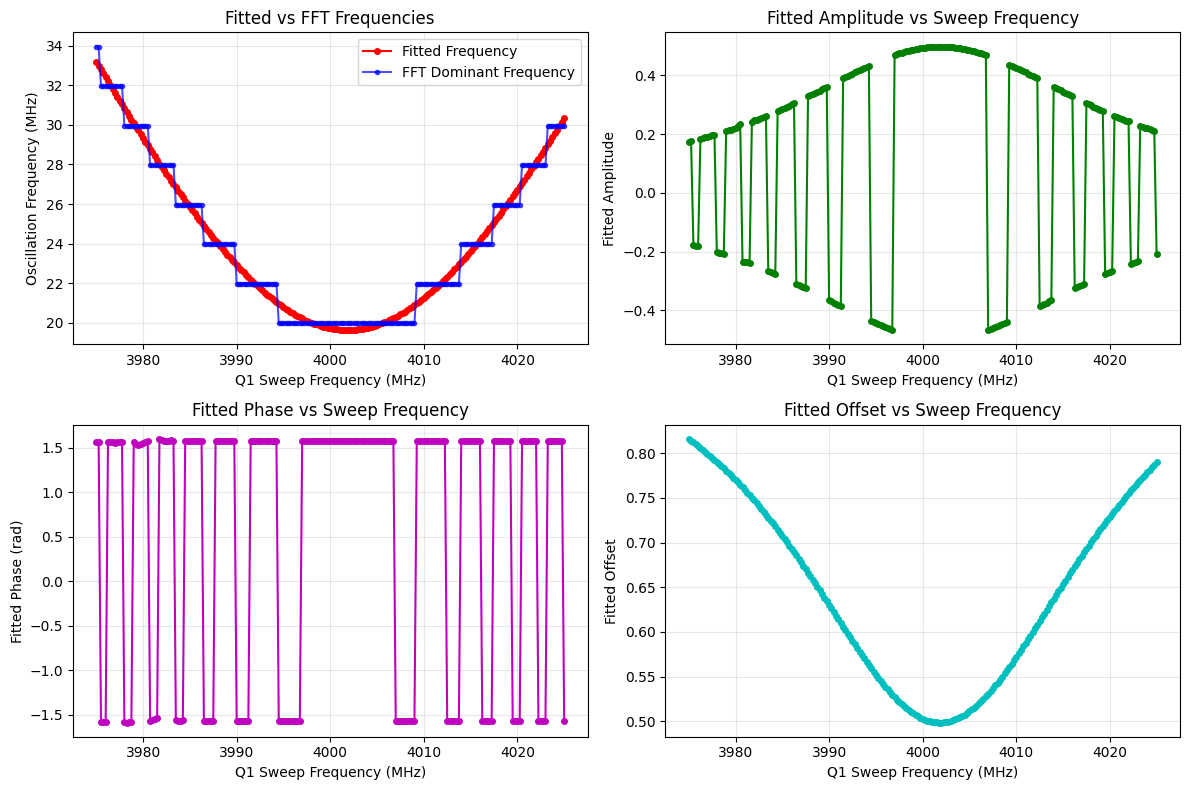

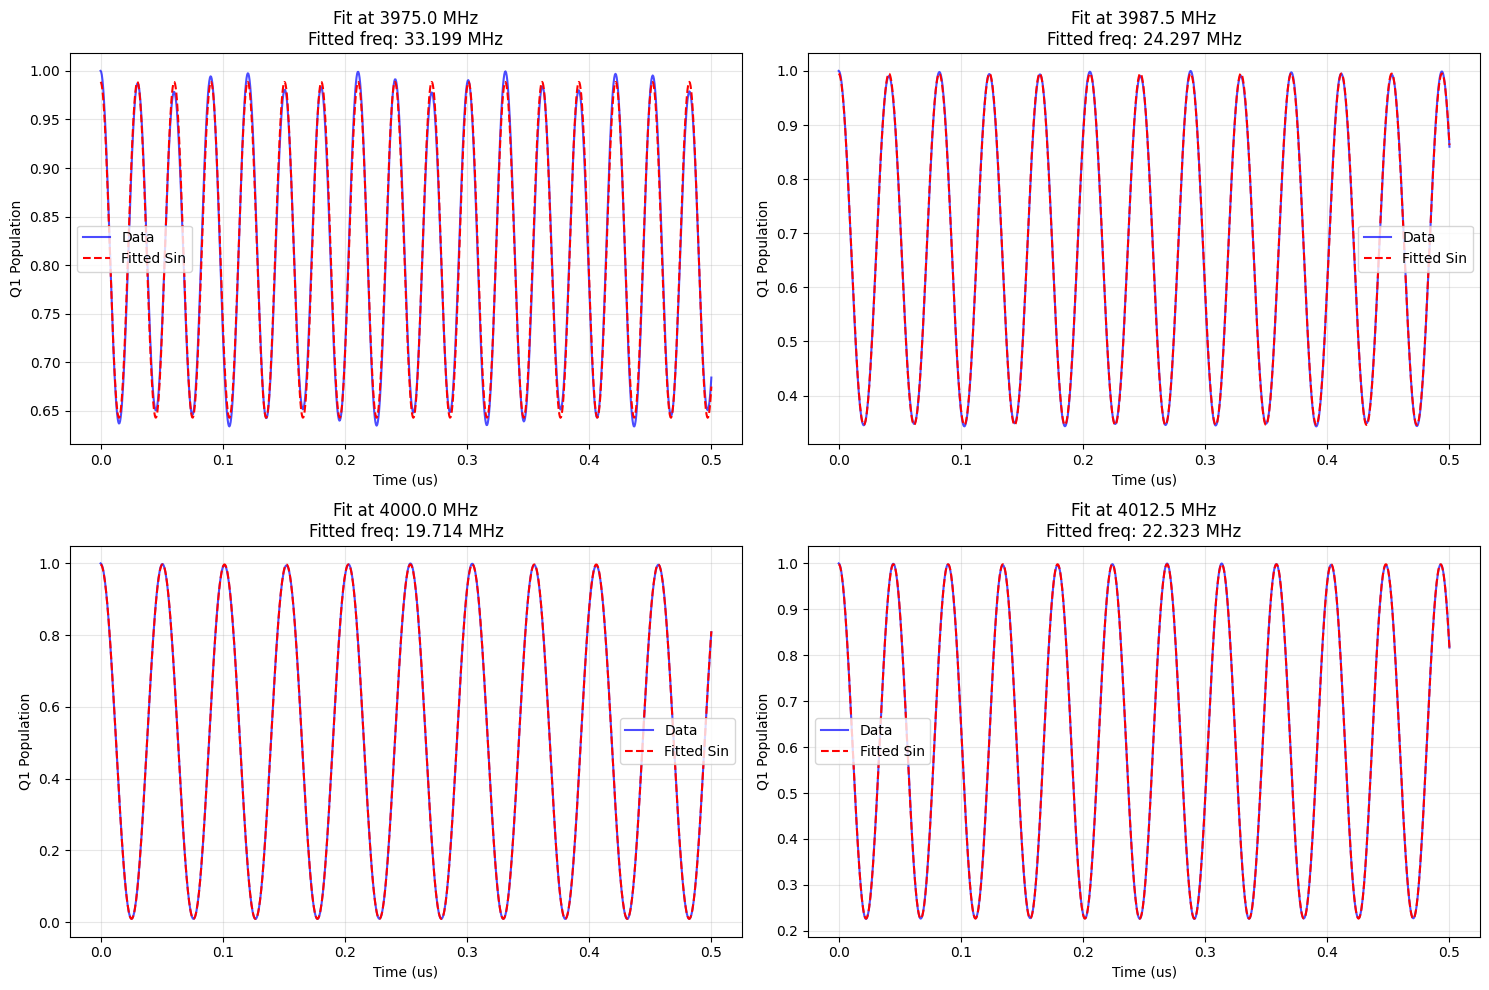

Mean difference between fitted and FFT frequencies: 0.4536 MHz
Max difference between fitted and FFT frequencies: 1.0084 MHz
Range of fitted frequencies: 19.6271 to 33.1989 MHz


In [132]:
from scipy.optimize import curve_fit

# Define sinusoidal function
def sin_func(t, amplitude, frequency, phase, offset):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) + offset

# Store fitted parameters
fitted_frequencies = []
fitted_amplitudes = []
fitted_phases = []
fitted_offsets = []

# Fit each frequency sweep data
for i in range(len(frequencies)):
    # Get population data for this sweep frequency
    pop_data = populations[0, i, :]
    
    # Initial parameter guesses
    amplitude_guess = (np.max(pop_data) - np.min(pop_data)) / 2
    frequency_guess = dominant_frequencies[i]  # Use FFT dominant frequency as initial guess
    phase_guess = 0
    offset_guess = np.mean(pop_data)
    
    initial_guess = [amplitude_guess, frequency_guess, phase_guess, offset_guess]
    
    try:
        # Fit the sinusoidal function
        popt, pcov = curve_fit(sin_func, times, pop_data, p0=initial_guess, maxfev=5000)
        
        fitted_amplitudes.append(popt[0])
        fitted_frequencies.append(popt[1])
        fitted_phases.append(popt[2])
        fitted_offsets.append(popt[3])
        
    except:
        # If fitting fails, use the initial guess values
        fitted_amplitudes.append(amplitude_guess)
        fitted_frequencies.append(frequency_guess)
        fitted_phases.append(phase_guess)
        fitted_offsets.append(offset_guess)

# Convert to numpy arrays
fitted_frequencies = np.array(fitted_frequencies)
fitted_amplitudes = np.array(fitted_amplitudes)
fitted_phases = np.array(fitted_phases)
fitted_offsets = np.array(fitted_offsets)

# Plot fitted frequencies vs sweep frequency
plt.figure(figsize=(12, 8))

# Subplot 1: Fitted frequencies vs sweep frequency
plt.subplot(2, 2, 1)
plt.plot(frequencies/2/np.pi, fitted_frequencies, 'ro-', markersize=4, label='Fitted Frequency')
plt.plot(frequencies/2/np.pi, dominant_frequencies, 'bo-', markersize=3, alpha=0.7, label='FFT Dominant Frequency')
plt.xlabel('Q1 Sweep Frequency (MHz)')
plt.ylabel('Oscillation Frequency (MHz)')
plt.title('Fitted vs FFT Frequencies')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Fitted amplitudes
plt.subplot(2, 2, 2)
plt.plot(frequencies/2/np.pi, fitted_amplitudes, 'go-', markersize=4)
plt.xlabel('Q1 Sweep Frequency (MHz)')
plt.ylabel('Fitted Amplitude')
plt.title('Fitted Amplitude vs Sweep Frequency')
plt.grid(True, alpha=0.3)

# Subplot 3: Fitted phases
plt.subplot(2, 2, 3)
plt.plot(frequencies/2/np.pi, fitted_phases, 'mo-', markersize=4)
plt.xlabel('Q1 Sweep Frequency (MHz)')
plt.ylabel('Fitted Phase (rad)')
plt.title('Fitted Phase vs Sweep Frequency')
plt.grid(True, alpha=0.3)

# Subplot 4: Fitted offsets
plt.subplot(2, 2, 4)
plt.plot(frequencies/2/np.pi, fitted_offsets, 'co-', markersize=4)
plt.xlabel('Q1 Sweep Frequency (MHz)')
plt.ylabel('Fitted Offset')
plt.title('Fitted Offset vs Sweep Frequency')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show example fits for a few frequency points
example_indices = [0, len(frequencies)//4, len(frequencies)//2, 3*len(frequencies)//4]

plt.figure(figsize=(15, 10))
for idx, freq_idx in enumerate(example_indices):
    plt.subplot(2, 2, idx+1)
    
    # Plot original data
    plt.plot(times, populations[0, freq_idx, :], 'b-', alpha=0.7, label='Data')
    
    # Plot fitted curve
    fitted_curve = sin_func(times, fitted_amplitudes[freq_idx], fitted_frequencies[freq_idx], 
                           fitted_phases[freq_idx], fitted_offsets[freq_idx])
    plt.plot(times, fitted_curve, 'r--', label='Fitted Sin')
    
    plt.xlabel('Time (us)')
    plt.ylabel('Q1 Population')
    plt.title(f'Fit at {frequencies[freq_idx]/2/np.pi:.1f} MHz\nFitted freq: {fitted_frequencies[freq_idx]:.3f} MHz')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison statistics
print(f'Mean difference between fitted and FFT frequencies: {np.mean(np.abs(fitted_frequencies - dominant_frequencies)):.4f} MHz')
print(f'Max difference between fitted and FFT frequencies: {np.max(np.abs(fitted_frequencies - dominant_frequencies)):.4f} MHz')
print(f'Range of fitted frequencies: {np.min(fitted_frequencies):.4f} to {np.max(fitted_frequencies):.4f} MHz')

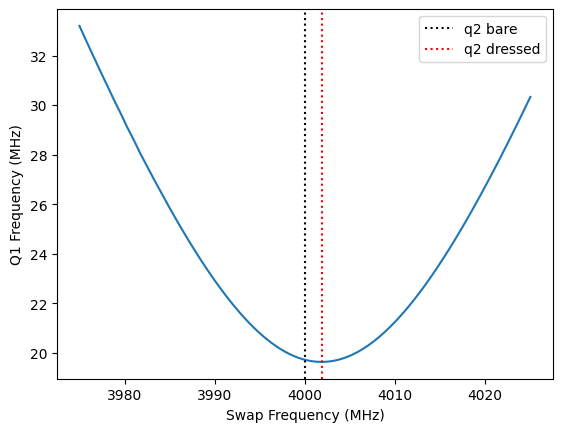

In [135]:
plt.plot(frequencies/2/np.pi, fitted_frequencies)

plt.axvline(omega_2/2/np.pi, linestyle=':', color='black', label='q2 bare')
plt.axvline(q2_dressed_frequency, linestyle=':', color='red', label='q2 dressed')

plt.xlabel('Swap Frequency (MHz)')
plt.ylabel('Q1 Frequency (MHz)')

plt.legend()
plt.show()
